In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn;seaborn.set()   # 设置画图风格
%matplotlib inline 

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x


In [2]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [5]:
# 选择排序都比bogosort排序算法的性能要好，示例如下：
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

In [6]:
x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

In [7]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [8]:
x.sort()
print(x)

[1 2 3 4 5]


In [9]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(x)

[2 1 4 3 5]


In [10]:
x[i]

array([1, 2, 3, 4, 5])

In [11]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [12]:
# 对X的每一列排序
np.sort(X, axis = 0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [13]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [14]:
np.partition(X, 2, axis = 1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

In [15]:
X = rand.rand(10, 2)

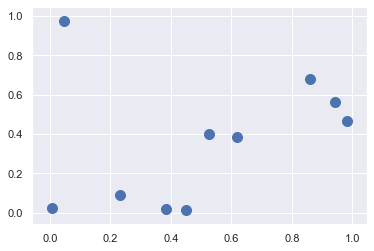

In [36]:
import matplotlib.pyplot as plt
import seaborn;seaborn.set()    # 设置画图风格
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], s=100);
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\NumPy\images\scatter02.jpg")

In [37]:
dist_sq = np.sum((X[:, np.newaxis,:] - X[np.newaxis, :,:]) ** 2, axis = -1)

In [38]:
# 在坐标系中计算每对点的差值
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [39]:
# 求出差值的平方
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [40]:
# 将差值求和获得的平方距离
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [41]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [42]:
nearest = np.argsort(dist_sq, axis = 1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


In [43]:
K = 2
nearest_partiton = np.argpartition(dist_sq, K + 1, axis = 1)

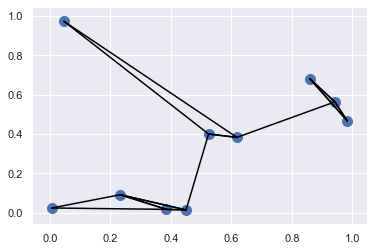

In [44]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# 将每个点与它的两个最近邻连接
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1,  axis = 1)

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # 画一条从X[j]的线段
        # 用zip方法实现：
        plt.plot(*zip(X[j], X[i]), color = 'black')
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\NumPy\images\scatter04.jpg")